In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\archive (9)\AirPassengers.csv")

In [51]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [52]:
df.columns=["Date","Passengers"]

In [53]:
df.isnull().sum()

Date          0
Passengers    0
dtype: int64

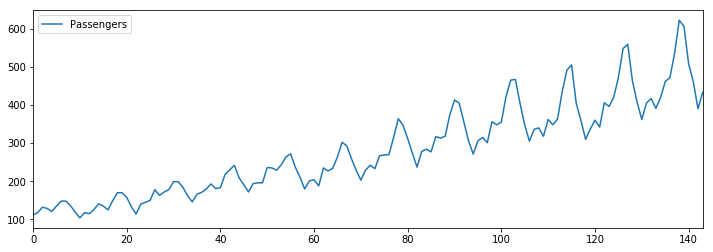

In [54]:
df.plot(figsize=(12,4))

In [55]:
df['Date']=pd.to_datetime(df['Date'])

In [56]:
df.set_index('Date',inplace=True)

In [57]:
df.head(5)

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [58]:
from statsmodels.tsa.stattools import adfuller

In [59]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [60]:
adfuller_test(df['Passengers'])

ADF Test Statistic : 0.8273719403667906
p-value : 0.9920653980124212
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [61]:
df['Diff'] = df['Passengers'] - df['Passengers'].shift(3)

In [62]:
adfuller_test(df['Diff'].dropna())

ADF Test Statistic : -2.881063531792013
p-value : 0.047594780668279824
#Lags Used : 10
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [63]:
df.tail(20)

,Passengers,Diff
Date,,
1959-05-01,420,78.0
1959-06-01,472,66.0
1959-07-01,548,152.0
1959-08-01,559,139.0
1959-09-01,463,-9.0
1959-10-01,407,-141.0
1959-11-01,362,-197.0
1959-12-01,405,-58.0
1960-01-01,417,10.0


In [64]:
import statsmodels.api

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

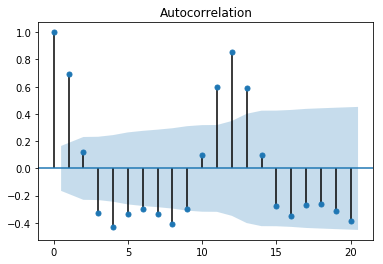

In [66]:
fig = statsmodels.graphics.tsaplots.plot_acf(df['Diff'].dropna(),lags=20)


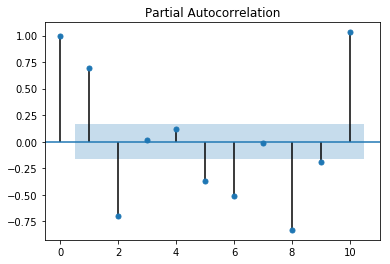

In [67]:
fig=plot_pacf(df['Diff'].dropna(),lags=10)

In [68]:
import statsmodels.api as sm

In [69]:
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(2, 1, 2),seasonal_order=(2,1,2,3))
results=model.fit()

c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


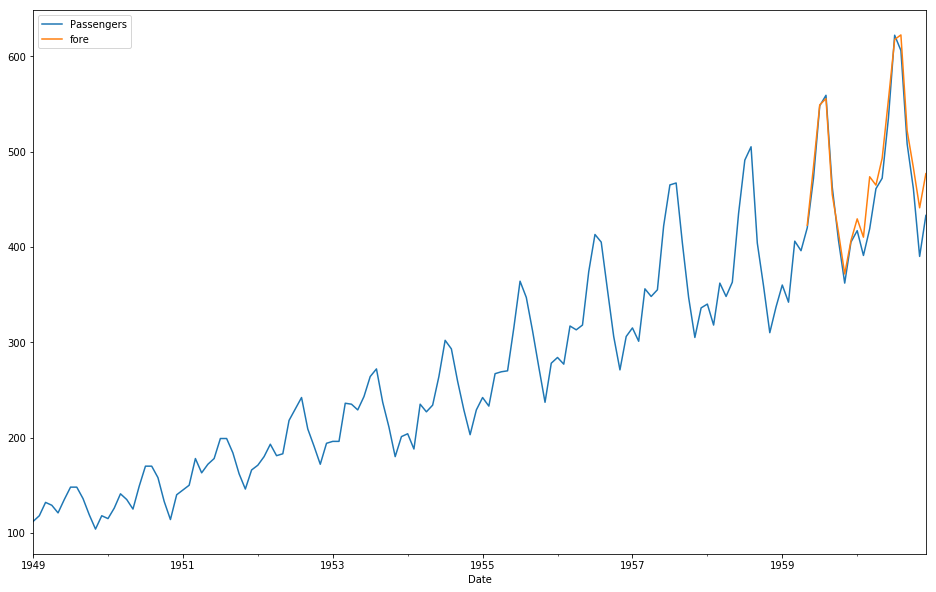

In [72]:
df['fore']=results.predict(start='1959-05-01',end='1960-12-01',dynamic=True)
df[['Passengers','fore']].plot(figsize=(16,10))